In [1]:
# import os
import sys
# from pathlib import Path

# module_path = os.path.abspath(os.path.join('../'))
# if module_path not in sys.path:
#     sys.path.append(module_path)

# import json
import numpy as np
# import pandas as pd
# import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


# from tqdm import tqdm
# from pathlib import Path
# from scipy.ndimage import gaussian_filter
# from matplotlib.colors import LogNorm

# sys.path.append("code/preprocessing/utils/")
# from segment2D     import *
# from segment3D     import *
# from file_handling import *

sys.path.append("code/analysis/utils/")
from data_class import AutocorrelationData, SegmentationData#, VariationData,
# from variation_functions import spatial_variation, global_density

# pix_to_um = get_pixel_size()

In [15]:
# experimental parameters
frames_to_hours = 1 / 12


# analytical parameters
bin_data = True
param = 'vv'


# define density colormap
densities  = np.arange(1400, 3400)
Ndensities = len(densities)

cmap   = mpl.colormaps['viridis']
colors = cmap(np.linspace(0.1, 0.9, Ndensities))
sm     = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=densities.min(), vmax=densities.max()))

print(np.shape(A2_cellcorr[0].spatial['vv']))
print(np.shape(A2_fieldcorr[0].spatial['vv']))

(103, 14)
(104, 14)


## Plotting datasets from dish A2

In [8]:
A2_datasets = ["holomonitor_20240516_A2-1",
               "holomonitor_20240516_A2-7"]

A2_data_avrg = "holomonitor_20240516_A2"

# Load data
A2_cellcorr  = []
A2_fieldcorr = []
A2_cellcorr_avrg  = AutocorrelationData(f"data/experimental/processed/{A2_data_avrg}/cell_autocorr.p")
A2_fieldcorr_avrg = AutocorrelationData(f"data/experimental/processed/{A2_data_avrg}/field_autocorr.p")

i = 0
for data in A2_datasets:
    A2_cellcorr.append(AutocorrelationData(f"data/experimental/processed/{data}/cell_autocorr.p"))
    A2_fieldcorr.append(AutocorrelationData(f"data/experimental/processed/{data}/field_autocorr.p"))

    # add density
    cellprop = SegmentationData(f"data/experimental/processed/{data}/cell_props.p")
    A2_cellcorr[i].add_density(cellprop.A)

    i += 1

State loaded from data/experimental/processed/holomonitor_20240516_A2/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-1/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-1/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-1/cell_props.p.
State saved to data/experimental/processed/holomonitor_20240516_A2-1/cell_autocorr.p
State loaded from data/experimental/processed/holomonitor_20240516_A2-7/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-7/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_A2-7/cell_props.p.
State saved to data/experimental/processed/holomonitor_20240516_A2-7/cell_autocorr.p


In [9]:
B1_datasets = ["holomonitor_20240516_B1-13",
               "holomonitor_20240516_B1-22",
               "holomonitor_20240516_B1-22"]

B1_data_avrg = "holomonitor_20240516_B1"

# Load data
B1_cellcorr  = []
B1_fieldcorr = []
B1_cellcorr_avrg  = AutocorrelationData(f"data/experimental/processed/{B1_data_avrg}/cell_autocorr.p")
B1_fieldcorr_avrg = AutocorrelationData(f"data/experimental/processed/{B1_data_avrg}/field_autocorr.p")

i = 0
for data in B1_datasets:
    B1_cellcorr.append(AutocorrelationData(f"data/experimental/processed/{data}/cell_autocorr.p"))
    B1_fieldcorr.append(AutocorrelationData(f"data/experimental/processed/{data}/field_autocorr.p"))

    # add density
    cellprop = SegmentationData(f"data/experimental/processed/{data}/cell_props.p")
    B1_fieldcorr[i].add_density(cellprop.A)
    B1_cellcorr[i].add_density(cellprop.A)

    i += 1

State loaded from data/experimental/processed/holomonitor_20240516_B1-13/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_B1-13/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_B1-13/cell_props.p.
State saved to data/experimental/processed/holomonitor_20240516_B1-13/field_autocorr.p
State saved to data/experimental/processed/holomonitor_20240516_B1-13/cell_autocorr.p
State loaded from data/experimental/processed/holomonitor_20240516_B1-22/cell_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_B1-22/field_autocorr.p.
State loaded from data/experimental/processed/holomonitor_20240516_B1-22/cell_props.p.
State saved to data/experimental/processed/holomonitor_20240516_B1-22/field_autocorr.p
State saved to data/experimental/processed/holomonitor_20240516_B1-22/cell_autocorr.p
State loaded from data/experimental/processed/holomonitor_20240516_B1-22/cell_autocorr.p.
State loaded from data/exper

Density array is longer than correlation array! Forcing equal length 103


KeyError: 'vv'

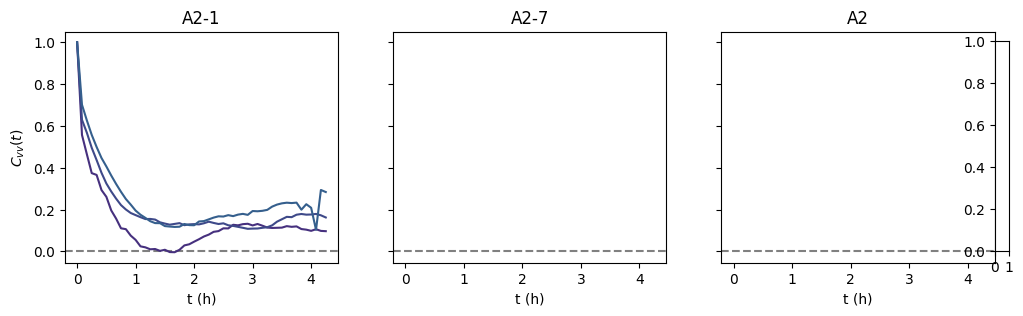

In [18]:
fig, ax = plt.subplots(1,3, figsize=(12,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([A2_datasets, [A2_data_avrg]])
for i in range(len(A2_fieldcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="t (h)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=rf"$C_{{{param}}}(t)$")


# plot datasets
for data_idx in range(len(A2_fieldcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = A2_fieldcorr[data_idx].bin_data('t', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(A2_fieldcorr[data_idx].t_array[param] * frames_to_hours, 
                              data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(A2_fieldcorr[data_idx].temporal[param])

        for i in range(Nframes):
            density_idx = int(A2_fieldcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(A2_fieldcorr[data_idx].t_array[param] * frames_to_hours, 
                              A2_fieldcorr[data_idx].temporal[param][i], c=colors[density_idx])



# plot average
Nbins = len(A2_fieldcorr_avrg.temporal[param])
for i in range(Nbins):
    density_idx = int(A2_fieldcorr_avrg.density[i]) - densities.min()
    ax[2].plot(A2_fieldcorr_avrg.t_array[param] * frames_to_hours, 
               A2_fieldcorr_avrg.temporal[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)

KeyError: 'vv'

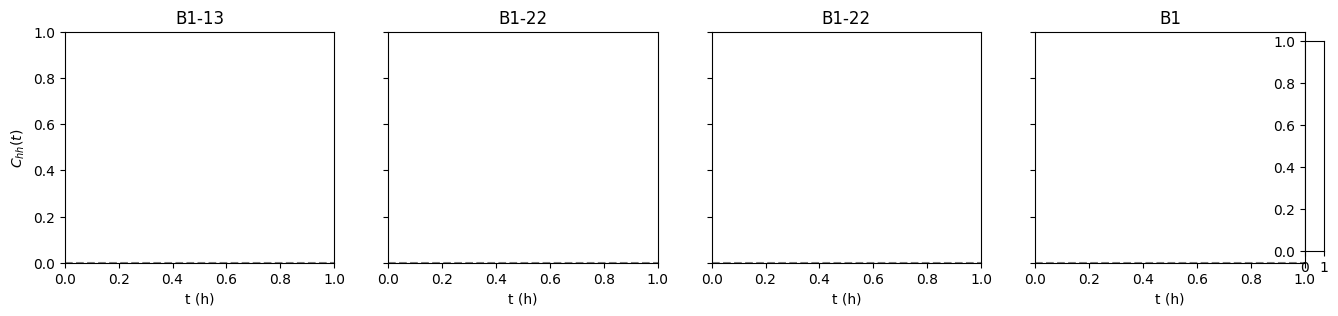

In [16]:
fig, ax = plt.subplots(1,4, figsize=(16,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([B1_datasets, [B1_data_avrg]])
for i in range(len(B1_fieldcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="t (h)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=r"$C_{hh}(t)$")


# plot datasets
for data_idx in range(len(B1_fieldcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = B1_fieldcorr[data_idx].bin_data('t', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(B1_fieldcorr[data_idx].t_array[param] * frames_to_hours, 
                              data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(B1_fieldcorr[data_idx].temporal[param])

        for i in range(Nframes):
            density_idx = int(B1_fieldcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(B1_fieldcorr[data_idx].t_array[param] * frames_to_hours, 
                              B1_fieldcorr[data_idx].temporal[param][i], c=colors[density_idx])



# plot average
Nbins = len(B1_fieldcorr_avrg.temporal[param])
for i in range(Nbins):
    density_idx = int(B1_fieldcorr_avrg.density[i]) - densities.min()
    ax[2].plot(B1_fieldcorr_avrg.t_array[param] * frames_to_hours, 
               B1_fieldcorr_avrg.temporal[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)

## Plot cell correlations

Density array is longer than correlation array! Forcing equal length 103


KeyError: 'vv'

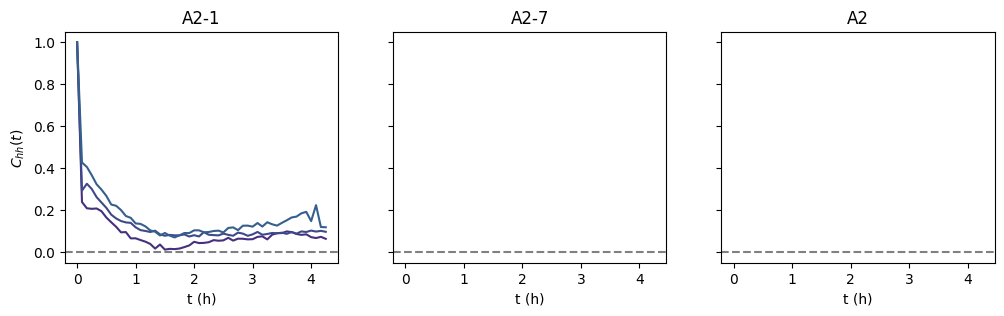

In [19]:
ig, ax = plt.subplots(1,3, figsize=(12,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([A2_datasets, [A2_data_avrg]])
for i in range(len(A2_cellcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="t (h)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=r"$C_{hh}(t)$")


# plot datasets
for data_idx in range(len(A2_cellcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = A2_cellcorr[data_idx].bin_data('t', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(A2_cellcorr[data_idx].t_array[param] * frames_to_hours, 
                              data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(A2_cellcorr[data_idx].temporal[param])

        for i in range(Nframes):
            density_idx = int(A2_cellcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(A2_cellcorr[data_idx].t_array[param] * frames_to_hours, 
                              A2_cellcorr[data_idx].temporal[param][i], c=colors[density_idx])



# plot average
Nbins = len(A2_cellcorr_avrg.temporal[param])
for i in range(Nbins):
    density_idx = int(A2_cellcorr_avrg.density[i]) - densities.min()
    ax[2].plot(A2_cellcorr_avrg.t_array[param] * frames_to_hours, 
               A2_cellcorr_avrg.temporal[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)

KeyError: 'vv'

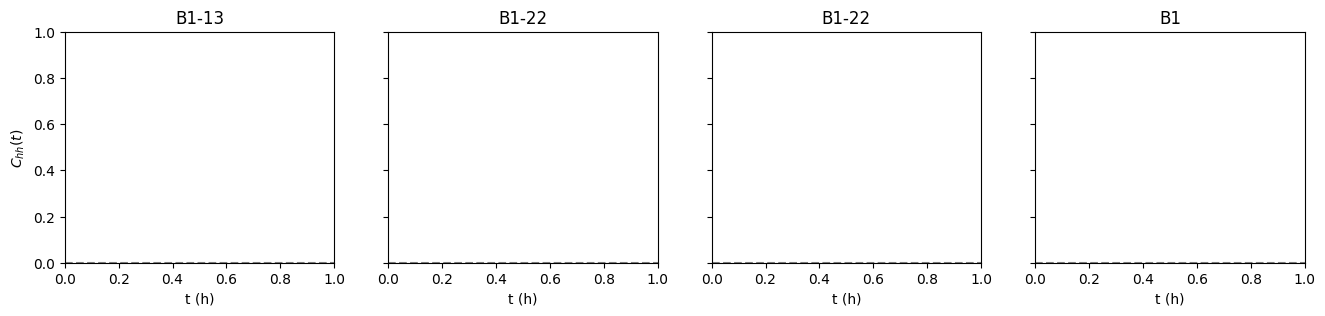

In [17]:
ig, ax = plt.subplots(1,4, figsize=(16,3), sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.9, 0.15, 0.012, 0.7])

# format figure
titles = np.concatenate([B1_datasets, [B1_data_avrg]])
for i in range(len(B1_cellcorr) + 1):
    ax[i].axhline(0, ls='dashed', c="gray")
    ax[i].set(xlabel="t (h)", title=titles[i].split("_")[-1])
ax[0].set(ylabel=r"$C_{hh}(t)$")


# plot datasets
for data_idx in range(len(B1_cellcorr)):

    # plot data in density bins
    if bin_data:
        data_tmp = B1_cellcorr[data_idx].bin_data('t', param)
        
        Nbins = len(data_tmp['mean'])
        bin_density = (data_tmp['density_bins'][1:] + data_tmp['density_bins'][:-1]) / 2

        for i in range(Nbins):
            density_idx = int(bin_density[i]) - densities.min()
            ax[data_idx].plot(B1_cellcorr[data_idx].t_array[param] * frames_to_hours, 
                              data_tmp['mean'][i], c=colors[density_idx])

    # plot data per frame
    else:
        Nframes = len(B1_cellcorr[data_idx].temporal[param])

        for i in range(Nframes):
            density_idx = int(B1_cellcorr[data_idx].density[i]) - densities.min()
            ax[data_idx].plot(B1_cellcorr[data_idx].t_array[param] * frames_to_hours, 
                              B1_cellcorr[data_idx].temporal[param][i], c=colors[density_idx])



# plot average
Nbins = len(B1_cellcorr_avrg.temporal[param])
for i in range(Nbins):
    density_idx = int(B1_cellcorr_avrg.density[i]) - densities.min()
    ax[2].plot(B1_cellcorr_avrg.t_array[param] * frames_to_hours, 
               B1_cellcorr_avrg.temporal[param][i], c=colors[density_idx])


# add colorbar
fig.subplots_adjust(right=0.88);
fig.colorbar(sm, label=r"$\rho_{cell} ~(mm^{-2})$", cax=cbar_ax)